## AML Project Group 5

### Part 1: Data Preprocessing and Visualization

#### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

/Users/nicolebrye/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nicolebrye/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


#### Reading in the data

In [2]:
# Data ordering:
# [0] Sellers
# [1] Category name translation
# [2] Orders
# [3] Order Items
# [4] Customers
# [5] Geolocation
# [6] Order Payments
# [7] Order Reviews
# [8] Products

files = os.listdir(os.path.join(os.getcwd(), 'data'))

DF = []
for f in files:
    DF.append(pd.read_csv(f'data/{f}'))

#### Merging

In [3]:
# Orders dataset (main)
orders = DF[2]
orders.head()

# Merge order dataset and order item dataset
order_items = DF[3]
temp1 = pd.merge(orders, order_items, how='left', on='order_id')

In [4]:
# Merge the combinded dataset with order reviews
order_reviews = DF[7]

temp2 = pd.merge(temp1, order_reviews, how='left', on='order_id')

In [5]:
# Merge the combined dataset with the products table
products = DF[8]

temp3 = pd.merge(temp2, products, how='left', on='product_id')

In [6]:
# Merge the combined datatset with the customer dataset
customers = DF[4]

temp4 = pd.merge(temp3, customers, how='left', on='customer_id')

In [7]:
# Merge the combined dataset with the sellers dataset
sellers = DF[0]

temp5 = pd.merge(temp4, sellers, how='left', on='seller_id')

In [8]:
# Merge the combined dataset with the geolocation dataset
geolocation = DF[5]

geo_clean = geolocation.drop(
    columns=['geolocation_city', 'geolocation_state']).groupby(
    'geolocation_zip_code_prefix').mean()

temp6 = pd.merge(temp5, geo_clean, how='left', 
                 left_on='customer_zip_code_prefix',
                 right_on='geolocation_zip_code_prefix')

In [9]:
# Merge the combined dataset with the seller geolocation

merged_df = pd.merge(temp6, geo_clean, how='left', 
                 left_on='seller_zip_code_prefix',
                 right_on='geolocation_zip_code_prefix',
                 suffixes=('_customer', '_seller'))
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG,-5.774190,-35.271143,-19.837682,-43.924053
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,9195,santo andre,SP,8752.0,mogi das cruzes,SP,-23.676370,-46.514627,-23.543395,-46.262086


#### Dropping columns

In [10]:
# Columns to remove
rem_cols = ['order_id', 'customer_id', 'order_item_id', 'product_id',
            'seller_id', 'review_id', 'review_comment_title',
            'review_comment_message', 'review_creation_date',
            'review_answer_timestamp', 'product_name_lenght',
            'product_description_lenght', 'customer_unique_id',
            'customer_city', 'customer_state', 'seller_city',
            'seller_state', 'shipping_limit_date', 'product_photos_qty'
           ]

merged_df = merged_df.drop(columns = rem_cols)
merged_df.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,review_score,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,8.72,4.0,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,9350.0,-23.576983,-46.587161,-23.680729,-46.444238
1,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,22.76,4.0,perfumaria,400.0,19.0,13.0,19.0,47813,31570.0,-12.177924,-44.660711,-19.807681,-43.980427
2,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,19.22,5.0,automotivo,420.0,24.0,19.0,21.0,75265,14840.0,-16.745150,-48.514783,-21.363502,-48.229601
3,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,27.20,5.0,pet_shop,450.0,30.0,10.0,20.0,59296,31842.0,-5.774190,-35.271143,-19.837682,-43.924053
4,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,8.72,5.0,papelaria,250.0,51.0,15.0,15.0,9195,8752.0,-23.676370,-46.514627,-23.543395,-46.262086


#### Handling dates and times

In [11]:
time_cols = list(merged_df.columns[merged_df.columns.str.endswith('date')])
time_cols = ['order_purchase_timestamp', 'order_approved_at'] + time_cols

In [12]:
for col in time_cols:
    merged_df[col] = pd.to_datetime(merged_df[col], format='%Y-%m-%d %H:%M:%S')

In [13]:
merged_df['approval_time'] = (
    merged_df['order_approved_at'] - merged_df['order_purchase_timestamp']
)
merged_df['approval_time'] = merged_df['approval_time'].dt.total_seconds() / 3600

# Time to package
merged_df['packaging_time'] = (
    merged_df['order_delivered_carrier_date'] - merged_df['order_approved_at']
)
merged_df['packaging_time'] = merged_df['packaging_time'].dt.total_seconds() / 3600

# # Delivery time
merged_df['delivery_time'] = (
    merged_df['order_delivered_customer_date'] - merged_df['order_delivered_carrier_date']
)
merged_df['delivery_time'] = merged_df['delivery_time'].dt.total_seconds() / 3600


# Delivery delay (could be negative if package shipped early)
merged_df['delivery_delay'] = (
    merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']
)
merged_df['delivery_delay'] = merged_df['delivery_delay'].dt.total_seconds() / 3600


merged_df = merged_df.drop(columns = time_cols)

#### Location distances

In [14]:
merged_df['product_volume_cm3'] = (
    merged_df['product_height_cm'] * merged_df['product_length_cm'] 
    * merged_df['product_width_cm']
)

In [15]:
dist_df = merged_df.copy()

gdf1 = gpd.GeoDataFrame(
    dist_df, geometry=gpd.points_from_xy(dist_df['geolocation_lng_customer'], 
                                      dist_df['geolocation_lat_customer']), 
    crs="EPSG:4326"
)

gdf2 = gpd.GeoDataFrame(
    dist_df, geometry=gpd.points_from_xy(dist_df['geolocation_lng_seller'], 
                                      dist_df['geolocation_lat_seller']), 
    crs="EPSG:4326"
)


In [16]:
gdf1 = gdf1.to_crs('EPSG:5234')
gdf2 = gdf2.to_crs('EPSG:5234')

dist_df['distance_km'] = gdf1.distance(gdf2) / 1000

In [17]:
dist_df[dist_df['geolocation_lat_customer'] > 0]

,order_status,price,freight_value,review_score,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,...,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,approval_time,packaging_time,delivery_time,delivery_delay,product_volume_cm3,distance_km
31,delivered,30.10,33.24,4.0,ferramentas_jardim,850.0,20.0,20.0,20.0,69317,...,2.822592,-60.754147,-25.501031,-49.333140,0.951389,31.687500,697.006667,-384.512778,8000.0,35558.430599
237,delivered,189.90,26.36,3.0,telefonia,450.0,17.0,3.0,11.0,68906,...,0.036307,-51.095214,-12.893167,-38.337875,0.158056,71.665833,556.108056,-650.601944,561.0,37235.164339
847,delivered,67.99,25.60,5.0,automotivo,4900.0,69.0,19.0,41.0,83252,...,42.184003,-8.723762,-26.232194,-49.411882,0.163333,15.545278,638.944444,268.077778,53751.0,25804.261479
2341,delivered,122.99,27.92,5.0,NaN,400.0,20.0,12.0,15.0,69307,...,2.855558,-60.660713,-23.436711,-46.511340,0.650556,37.154444,646.833611,-313.854444,3600.0,35668.465623
5143,shipped,39.99,31.67,1.0,moveis_decoracao,1400.0,32.0,6.0,28.0,69309,...,2.813746,-60.701007,-22.430218,-46.573405,784.045556,263.946667,NaN,NaN,5376.0,35827.236221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110454,delivered,69.90,47.02,1.0,cama_mesa_banho,1150.0,30.0,10.0,30.0,69316,...,2.779962,-60.734700,-21.757321,-48.829744,15.575000,52.444444,1706.358056,715.642778,9000.0,36067.050157
111059,delivered,119.90,29.24,1.0,beleza_saude,1900.0,27.0,9.0,18.0,68275,...,22.567952,-27.698087,-21.254548,-47.815291,0.702500,121.203056,492.852222,-375.017222,4374.0,30706.978422
112193,delivered,89.90,81.79,4.0,esporte_lazer,353.0,23.0,15.0,16.0,69380,...,3.362115,-59.833222,-23.382472,-51.927966,0.453333,51.151667,389.073056,-941.543611,5520.0,35914.995662
113056,delivered,385.00,40.24,5.0,eletronicos,600.0,22.0,6.0,20.0,68980,...,3.842508,-51.833958,-23.547054,-46.929721,0.184444,80.774167,649.035000,8.648333,2640.0,35434.597760


#### Handle Missing Values

In [18]:
dist_df.isnull().sum()/len(dist_df)

order_status                0.000000
price                       0.006819
freight_value               0.006819
review_score                0.008423
product_category_name       0.020948
product_weight_g            0.006977
product_length_cm           0.006977
product_height_cm           0.006977
product_width_cm            0.006977
customer_zip_code_prefix    0.000000
seller_zip_code_prefix      0.006819
geolocation_lat_customer    0.002726
geolocation_lng_customer    0.002726
geolocation_lat_seller      0.009072
geolocation_lng_seller      0.009072
approval_time               0.001420
packaging_time              0.017486
delivery_time               0.028521
delivery_delay              0.028512
product_volume_cm3          0.006977
distance_km                 0.011754
dtype: float64

In [19]:
# Missing value imputation
imp_cols = ['approval_time', 'packaging_time', 'delivery_time', 'delivery_delay',
            'price']

drop_cols = dist_df.columns[~dist_df.columns.isin(imp_cols),]

s_imp = SimpleImputer()
s_imp.fit(dist_df[imp_cols])
dist_df[imp_cols] = s_imp.transform(dist_df[imp_cols])

clean_df = dist_df.dropna()

#### Visualizations

In [20]:
sns.set_style(style='darkgrid')

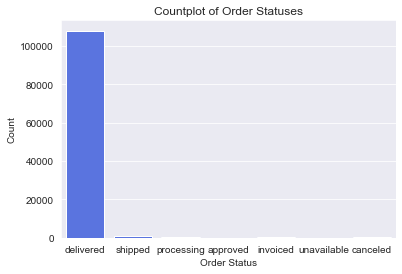

In [21]:
delivery_order = ['delivered', 'shipped', 'processing', 'approved', 'invoiced', 'unavailable', 'canceled']
sns.countplot(data=clean_df, x='order_status', color='#4467F5', order = delivery_order)
plt.title('Countplot of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

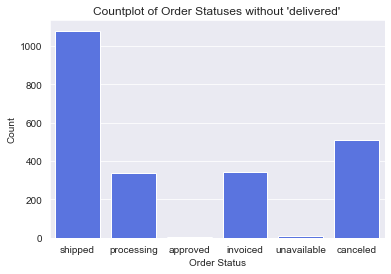

In [22]:
sns.countplot(data=clean_df[clean_df['order_status'] != 'delivered'], x='order_status', 
              color = '#4467F5', order = delivery_order[1:])
plt.title('Countplot of Order Statuses without \'delivered\'')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

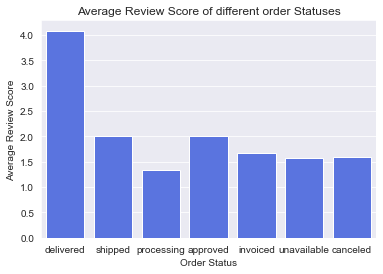

,order_status,price,freight_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,approval_time,packaging_time,delivery_time,delivery_delay,product_volume_cm3,distance_km
0,approved,69.866667,10.493333,2.000000,83.333333,28.333333,15.333333,19.666667,26478.333333,25880.333333,-21.199572,-45.836743,-22.550310,-46.584954,46.506574,68.483096,220.566807,-272.132306,7058.666667,260.946596
1,canceled,179.450982,19.956542,1.599214,2174.003929,29.939096,18.697446,23.611002,27756.216110,22160.320236,-21.959257,-46.157853,-23.036277,-46.978234,12.785437,69.689913,221.453119,-278.167647,17297.726916,698.512370
2,delivered,119.827639,19.957854,4.083147,2090.382904,30.188177,16.590202,23.023124,35076.559194,24547.599049,-21.252535,-46.221168,-22.796708,-47.251494,10.531481,68.097160,219.468212,-273.279600,15216.960840,940.653281
3,invoiced,174.851108,21.280671,1.676385,2413.542274,30.451895,19.825073,23.064140,32923.571429,24283.463557,-22.196998,-46.636678,-22.744089,-47.158520,9.991890,68.483096,220.566807,-272.132306,20334.037901,699.498387
4,processing,168.219586,25.440740,1.337278,2280.668639,31.600592,21.159763,24.497041,34105.636095,26218.355030,-20.869530,-46.185234,-22.964637,-46.993673,22.313010,68.483096,220.566807,-272.132306,25736.331361,1130.431374
5,shipped,127.832032,22.559091,2.005566,2408.564007,31.126160,17.116883,23.648423,36245.168831,22248.611317,-19.577674,-44.883192,-22.629781,-47.123239,12.616825,79.955809,220.566807,-272.132306,17002.261596,1335.946136
6,unavailable,286.812857,18.971429,1.571429,956.428571,29.571429,16.714286,28.714286,30963.857143,35735.142857,-23.164415,-45.812153,-20.591277,-44.000814,10.660595,68.483096,220.566807,-272.132306,15957.000000,1177.067754


In [23]:
df_draw_mean = clean_df.drop(columns='product_category_name').groupby('order_status').mean().reset_index()
sns.barplot(x='order_status', y='review_score', data=df_draw_mean, color='#4467F5', order = delivery_order)
plt.xlabel('Order Status')
plt.ylabel('Average Review Score')
plt.title('Average Review Score of different order Statuses')
plt.show()
df_draw_mean

False


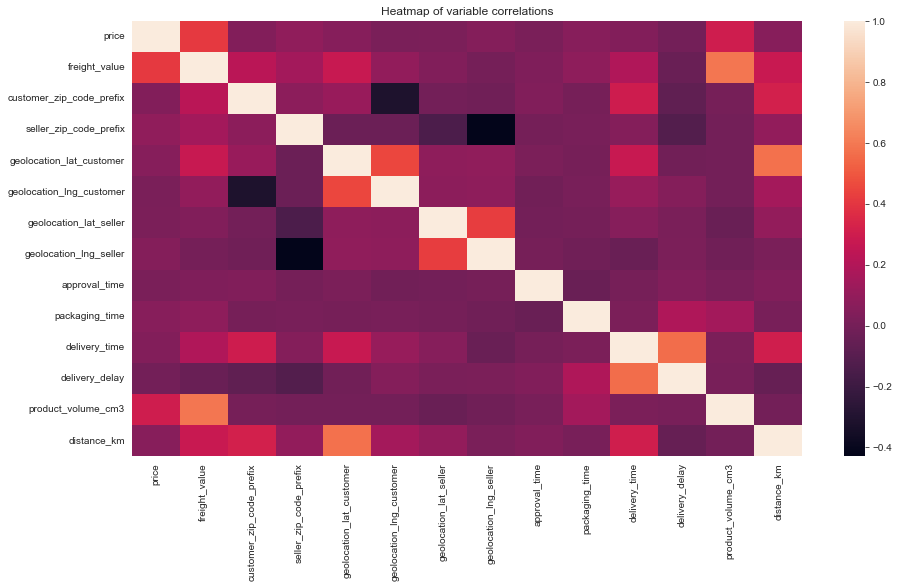

In [24]:
# Correlation Heatmap

feats = clean_df.copy()
feats = feats.drop(columns = ['product_width_cm', 'product_length_cm', 'product_height_cm',
                              'product_weight_g'])

num_cols = feats.columns[~feats.columns.isin(
    ['order_status', 'product_category_name', 'review_score']
)]

correlation = feats[num_cols].corr()
print(((correlation >= 0.8) & (correlation < 1.0)).any().any())

plt.figure(figsize = (15, 8))
sns.heatmap(clean_df[num_cols].corr())
plt.title('Heatmap of variable correlations')
plt.show()

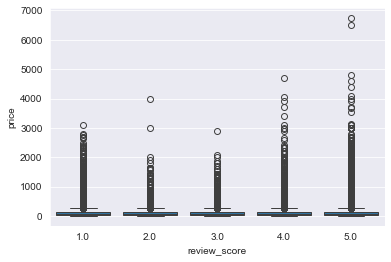

In [25]:
ax = sns.boxplot(data=feats, x='review_score', y='price')

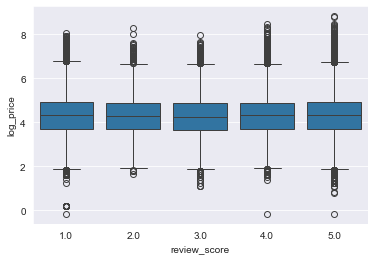

In [26]:
clean_df['log_price'] = np.log(clean_df['price'])
ax = sns.boxplot(data=clean_df, x='review_score', y='log_price')


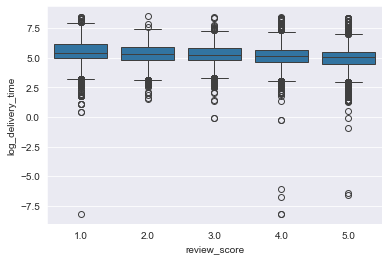

In [27]:
clean_df['log_delivery_time'] = np.log(clean_df['delivery_time'])
ax = sns.boxplot(data=clean_df, x='review_score', y='log_delivery_time')

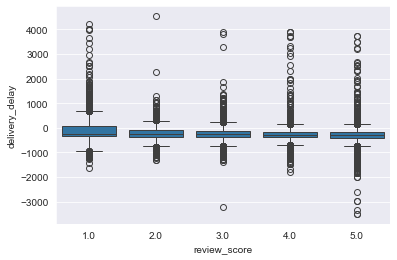

In [28]:
ax = sns.boxplot(data=clean_df, x='review_score', y='delivery_delay')


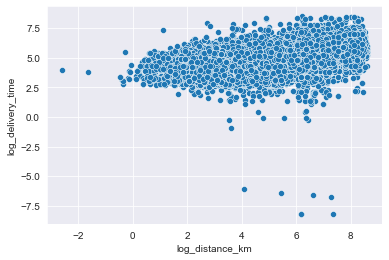

In [29]:
clean_df['log_distance_km'] = np.log(clean_df['distance_km'])
ax = sns.scatterplot(data=clean_df[clean_df['distance_km'] < 6000], x='log_distance_km', y='log_delivery_time')

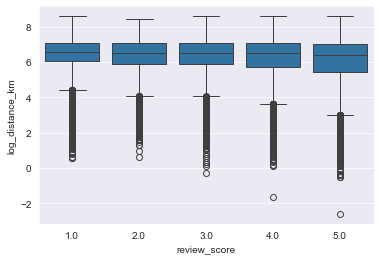

In [30]:
ax = sns.boxplot(data=clean_df[clean_df['distance_km'] < 6000], x='review_score', y='log_distance_km')


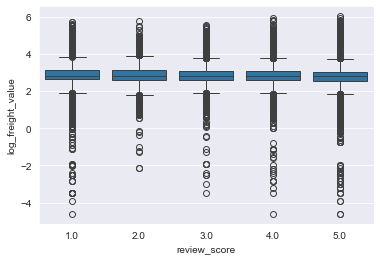

In [31]:
clean_df['log_freight_value'] = np.log(clean_df['freight_value'])
ax = sns.boxplot(data=clean_df, x='review_score', y='log_freight_value')

#### Geoplots

In [32]:
# Tables Brasil and states
uf_br0 = gpd.read_file('/Users/nicolebrye/Downloads/gadm36_BRA_shp' + '/gadm36_BRA_0.shp')
uf_br1 = gpd.read_file('/Users/nicolebrye/Downloads/gadm36_BRA_shp' + '/gadm36_BRA_1.shp')

In [33]:
pgdf1 = gdf1.to_crs('EPSG:4326')
pgdf2 = gdf2.to_crs('EPSG:4326')

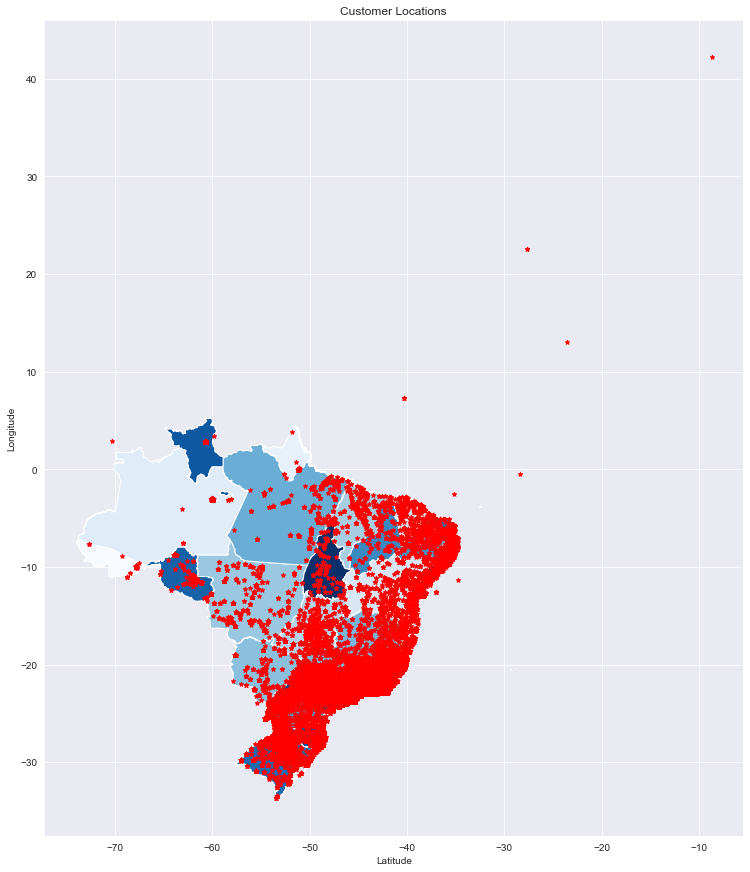

In [34]:
fig,ax = plt.subplots(figsize = (15,15))
uf_br1.plot(ax=ax, cmap='Blues')
g = pgdf1.plot(ax = ax, markersize = 20, color = 'red',marker = '*')

plt.title('Customer Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


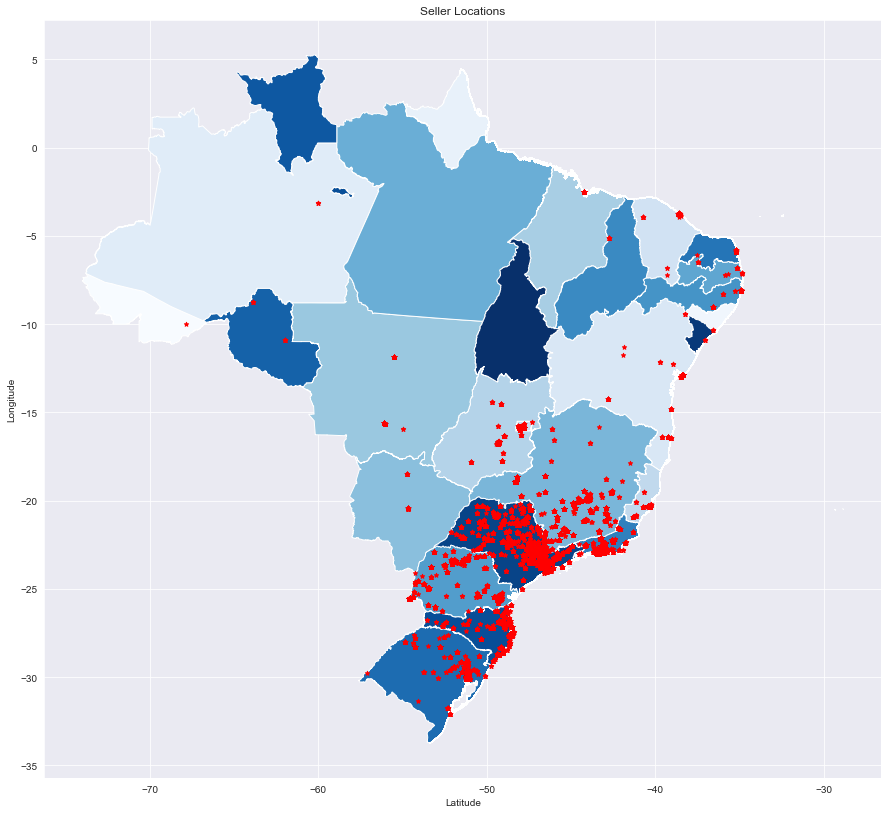

In [35]:
fig,ax = plt.subplots(figsize = (15,15))
uf_br1.plot(ax=ax, cmap='Blues')
g = pgdf2.plot(ax = ax, markersize = 20, color = 'red',marker = '*')

plt.title('Seller Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Part 2: Encoding the Data and Modeling

#### Imports

In [36]:
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

#### Target Encoding

In [37]:
# Copy the features DataFrame
enc = feats.copy()

# Target encode the product category name
from sklearn.preprocessing import TargetEncoder

target_encoder = TargetEncoder(target_type="continuous")
enc['product_category_encoded'] = target_encoder.fit_transform(
    enc['product_category_name'].to_frame(), enc['review_score']
)
enc = enc.drop(columns=['product_category_name'])
enc.head()

,order_status,price,freight_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,approval_time,packaging_time,delivery_time,delivery_delay,product_volume_cm3,distance_km,product_category_encoded
0,delivered,29.99,8.72,4.0,3149,9350.0,-23.576983,-46.587161,-23.680729,-46.444238,0.178333,56.795833,145.503611,-170.579722,1976.0,27.158643,4.060145
1,delivered,118.70,22.76,4.0,47813,31570.0,-12.177924,-44.660711,-19.807681,-43.980427,30.713889,11.109167,288.945833,-128.537500,4693.0,1373.961130,4.163426
2,delivered,159.90,19.22,5.0,75265,14840.0,-16.745150,-48.514783,-21.363502,-48.229601,0.276111,4.910278,220.274722,-413.891944,9576.0,754.142782,4.075719
3,delivered,45.00,27.20,5.0,59296,31842.0,-5.774190,-35.271143,-19.837682,-43.924053,0.298056,89.900000,226.811944,-311.521667,6000.0,3408.524750,4.165297
4,delivered,19.90,8.72,5.0,9195,8752.0,-23.676370,-46.514627,-23.543395,-46.262086,1.030556,21.434722,46.507778,-221.716111,11475.0,43.512482,4.190742


#### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

X = enc.drop(columns='review_score')
y = enc['review_score']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, 
                                                random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, 
#                                                   random_state=42)

In [39]:
X_dev.head()

,order_status,price,freight_value,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller,approval_time,packaging_time,delivery_time,delivery_delay,product_volume_cm3,distance_km,product_category_encoded
1900,delivered,149.90,53.40,13940,51250.0,-22.477153,-46.619373,-8.135891,-34.932536,0.185556,25.461111,103.543056,-386.490278,4840.0,3624.966719,3.938387
111914,delivered,134.00,19.91,17050,89069.0,-22.325549,-49.094331,-26.796411,-49.095901,0.309444,3.822500,197.898333,-795.701667,4860.0,692.330470,4.106014
67365,delivered,75.00,18.63,31015,19063.0,-19.911128,-43.925737,-22.128140,-51.441436,0.183333,132.699167,77.997778,-150.235556,9375.0,1204.965364,4.039950
68410,delivered,639.90,101.85,17900,89251.0,-21.486393,-51.533744,-26.486691,-49.081236,10.681667,66.155000,196.634167,-311.052222,147620.0,837.930846,4.102957
94529,delivered,24.75,12.69,5640,14940.0,-23.616394,-46.739847,-21.757321,-48.829744,17.973333,39.066111,115.915278,-320.920833,10000.0,430.169012,3.898417


#### One Hot Encoding

In [40]:
# Development Set
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), ['order_status']),
], remainder='passthrough')

X_dev_ohe = pd.DataFrame(ct.fit_transform(X_dev))

import re
cols = [re.sub('^remainder__', '', x) for x in ct.get_feature_names_out()]
cols = [re.sub('^ohe__', '', x) for x in cols]

X_dev_ohe.columns = cols

In [41]:
X_test_ohe = pd.DataFrame(ct.transform(X_test))

cols = [re.sub('^remainder__', '', x) for x in ct.get_feature_names_out()]
cols = [re.sub('^ohe__', '', x) for x in cols]

X_test_ohe.columns = cols

#### SMOTE sampling

In [42]:
sm = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = sm.fit_resample(X_dev_ohe, y_dev)

#### Baseline model

In [43]:
# Model 1: Vanilla logistic regression
lr1 = LogisticRegression(multi_class='ovr', solver='liblinear')
lr1.fit(X_dev_ohe, y_dev)
score1_dev = lr1.score(X_dev_ohe, y_dev)
score1_test = lr1.score(X_test_ohe, y_test)
print(f'Accuracy of logistic regression model on the development set with no SMOTE sampling: {round(score1_dev, 3)}')
print(f'Accuracy of logistic regression model on the test set with no SMOTE sampling: {round(score1_test, 3)}')
print('\n')

# Model 2: Logistic Regression with SMOTE sampling
lr2 = LogisticRegression(multi_class='ovr', solver='liblinear')
lr2.fit(X_dev_smote, y_dev_smote)
score2_dev = lr2.score(X_dev_ohe, y_dev)
score2_test = lr2.score(X_test_ohe, y_test)
print(f'Accuracy of logistic regression model on the development set with SMOTE sampling: {round(score2_dev, 3)}')
print(f'Accuracy of logistic regression model on the test set with SMOTE sampling: {round(score2_test, 3)}')

Accuracy of logistic regression model on the development set with no SMOTE sampling: 0.586
Accuracy of logistic regression model on the test set with no SMOTE sampling: 0.586


Accuracy of logistic regression model on the development set with SMOTE sampling: 0.437
Accuracy of logistic regression model on the test set with SMOTE sampling: 0.435


#### Binarize the labels

In [44]:
y_dev_bin = y_dev.apply(lambda x: 1 if x <=2 else 0)
y_test_bin = y_test.apply(lambda x: 1 if x <=2 else 0)

#### SMOTE sampling with the binarized data

In [286]:
# sm = SMOTE(random_state=42)
# X_dev_smote, y_dev_bin_smote = sm.fit_resample(X_dev_ohe, y_dev_bin)

#### Performing GridSearchCV on a LogisticRegression model with binarized data

In [53]:
grid = {'solver': ['lbfgs', 'newton-cg', 'liblinear'],
        'C': [0.1, 1, 10],
        'class_weight': ['balanced']
       }

gs = GridSearchCV(LogisticRegression(random_state=42), grid, cv=5)

gs.fit(X_dev_ohe, y_dev_bin)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']})

In [54]:
best = gs.best_estimator_

In [55]:
best.fit(X_dev_ohe, y_dev_bin)

LogisticRegression(C=10, class_weight='balanced', random_state=42,
                   solver='newton-cg')

In [56]:
# best.score(X_dev_smote, y_dev_bin_smote)
bscore_dev  = best.score(X_dev_ohe, y_dev_bin)
bscore_test = best.score(X_test_ohe, y_test_bin)

print(bscore_dev)
print(bscore_test)
# best.score()

0.7514374822795576
0.748049355833787


#### Performing GridSearchCV on a RandomForestClassifier model with binarized data

In [59]:
from sklearn.ensemble import RandomForestClassifier

grid2 = {'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 20]
        }

gs2 = GridSearchCV(RandomForestClassifier(), grid2, cv=5)

gs2.fit(X_dev_ohe, y_dev_bin)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [60]:
best2 = gs2.best_estimator_

In [61]:
best2.fit(X_dev_ohe, y_dev_bin)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [62]:
bscore2_dev  = best2.score(X_dev_ohe, y_dev_bin)
bscore2_test = best2.score(X_test_ohe, y_test_bin)

print(bscore2_dev)
print(bscore2_test)

0.9114374822795577
0.8826438033024859


#### Creating a XGB Classifier for the binarized data

In [45]:
from xgboost import XGBClassifier

grid3 = {'n_estimators': [50, 100, 150],
         'max_depths': [5, 10, 20],
         'learning_rates': [0.05, 0.1, 0.15]
         }

gs3 = GridSearchCV(XGBClassifier(), grid3, cv=5)

gs3.fit(X_dev_ohe, y_dev_bin)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rates': [0.05, 0.1, 0.15],
                         'max_depths': [5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [47]:
best3 = gs3.best_estimator_

In [48]:
best3.fit(X_dev_ohe, y_dev_bin)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              learning_rates=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_depths=5, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, ...)

In [49]:
bscore3_dev  = best3.score(X_dev_ohe, y_dev_bin)
bscore3_test = best3.score(X_test_ohe, y_test_bin)

print(bscore3_dev)
print(bscore3_test)

0.9097022965693223
0.8835057158410452


#### Feature Importance of the models

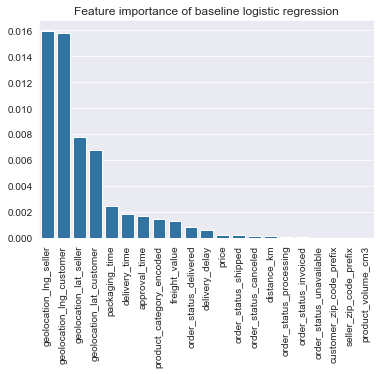

In [50]:
#baseline
feat_imps_baseline = zip(X_dev_smote.columns, abs(lr2.coef_[0]))
feats,imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feat_imps_baseline)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(x = list(feats),y = list(imps))
ax.set_title("Feature importance of baseline logistic regression")
ax.tick_params(axis='x', rotation=90);

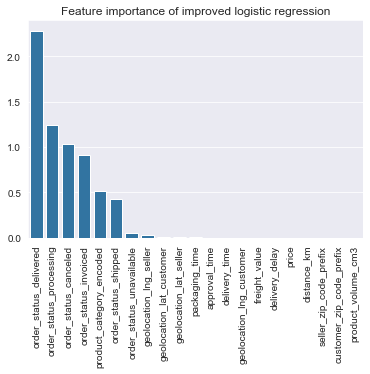

In [57]:
#Logistic regression w/ hyperparameter tuning
feat_imps_logistic = zip(X_dev_ohe.columns, abs(best.coef_[0]))
feats,imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feat_imps_logistic)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(x = list(feats),y = list(imps))
ax.set_title("Feature importance of improved logistic regression")
ax.tick_params(axis='x', rotation=90);

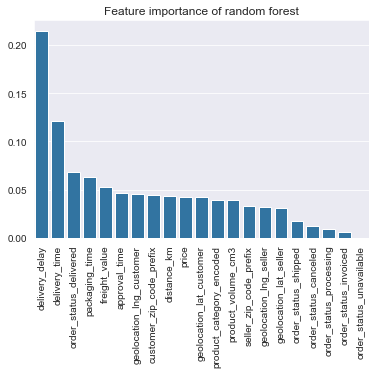

In [63]:
#Random Forest
feat_imps_rf = zip(X_dev_ohe.columns, best2.feature_importances_)
feats,imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feat_imps_rf)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(x = list(feats),y = list(imps))
ax.set_title("Feature importance of random forest")
ax.tick_params(axis='x', rotation=90);

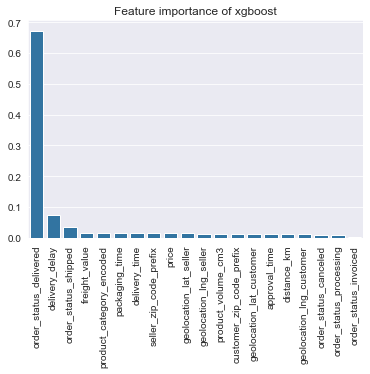

In [64]:
#XGBoost
feat_imps_xgb = zip(X_dev_ohe.columns, best3.feature_importances_)
feats,imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feat_imps_xgb)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(x = list(feats),y = list(imps))
ax.set_title("Feature importance of xgboost")
ax.tick_params(axis='x', rotation=90);

#### Neural Network for Binary Classification

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
def new_model():
    model = Sequential()
    input_shape = 21

    model.add(Dense(128, activation='relu', input_dim=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [69]:
from scikeras.wrappers import KerasClassifier
X_train_ohe, X_val_ohe, y_train_bin, y_val_bin = train_test_split(X_dev_ohe, y_dev_bin, test_size = 0.25, 
                                                random_state=42)
model = KerasClassifier(new_model)
grid4 = {
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

gs4 = GridSearchCV(model, grid4, cv=3)
gs4.fit(X_train_ohe, y_train_bin, validation_data = (X_val_ohe, y_val_bin))

2023-12-05 02:57:58.312216: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
2756/2756 [==============================] - 3s 1ms/step - loss: 76.5294 - accuracy: 0.7549 - val_loss: 63.4225 - val_accuracy: 0.8454
Epoch 2/10
2756/2756 [==============================] - 3s 1000us/step - loss: 51.9464 - accuracy: 0.7551 - val_loss: 51.9586 - val_accuracy: 0.7841
Epoch 3/10
2756/2756 [==============================] - 3s 1ms/step - loss: 44.5247 - accuracy: 0.7559 - val_loss: 64.8462 - val_accuracy: 0.8449
Epoch 4/10
2756/2756 [==============================] - 3s 1ms/step - loss: 35.6966 - accuracy: 0.7565 - val_loss: 12.5485 - val_accuracy: 0.7842
Epoch 5/10
2756/2756 [==============================] - 3s 1ms/step - loss: 29.7366 - accuracy: 0.7575 - val_loss: 22.2988 - val_accuracy: 0.6568
Epoch 6/10
2756/2756 [==============================] - 3s 1ms/step - loss: 23.6850 - accuracy: 0.7552 - val_loss: 22.4865 - val_accuracy: 0.8457
Epoch 7/10
2756/2756 [==============================] - 3s 993us/step - loss: 21.4947 - accuracy: 0.7573 - val_loss: 6.86

Epoch 10/10
689/689 [==============================] - 1s 507us/step
Epoch 1/10
1378/1378 [==============================] - 2s 1ms/step - loss: 65.9533 - accuracy: 0.7499 - val_loss: 47.3711 - val_accuracy: 0.8451
Epoch 2/10
1378/1378 [==============================] - 1s 1ms/step - loss: 44.9719 - accuracy: 0.7535 - val_loss: 41.1502 - val_accuracy: 0.8459
Epoch 3/10
1378/1378 [==============================] - 1s 979us/step - loss: 37.7813 - accuracy: 0.7569 - val_loss: 49.2744 - val_accuracy: 0.7637
Epoch 4/10
1378/1378 [==============================] - 2s 1ms/step - loss: 35.7835 - accuracy: 0.7579 - val_loss: 24.8480 - val_accuracy: 0.5523
Epoch 5/10
1378/1378 [==============================] - 1s 1ms/step - loss: 34.3844 - accuracy: 0.7568 - val_loss: 28.8704 - val_accuracy: 0.7973
Epoch 6/10
1378/1378 [==============================] - 1s 987us/step - loss: 28.6133 - accuracy: 0.7592 - val_loss: 17.0049 - val_accuracy: 0.6506
Epoch 7/10
1378/1378 [=============================

GridSearchCV(cv=3,
             estimator=KerasClassifier(model=<function new_model at 0x7fce034ad940>),
             param_grid={'batch_size': [16, 32], 'epochs': [10, 20]})

In [70]:
model = Sequential()
input_shape = 21

model.add(Dense(128, activation='relu', input_dim=input_shape))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_ohe, y_train_bin, validation_data = (X_val_ohe, y_val_bin), batch_size = 16, epochs = 20)

Epoch 1/20
4134/4134 [==============================] - 4s 963us/step - loss: 68.7693 - accuracy: 0.7526 - val_loss: 33.8244 - val_accuracy: 0.5536
Epoch 2/20
4134/4134 [==============================] - 4s 932us/step - loss: 44.8184 - accuracy: 0.7576 - val_loss: 47.5699 - val_accuracy: 0.4480
Epoch 3/20
4134/4134 [==============================] - 4s 929us/step - loss: 32.5975 - accuracy: 0.7591 - val_loss: 24.0501 - val_accuracy: 0.5988
Epoch 4/20
4134/4134 [==============================] - 4s 937us/step - loss: 23.5263 - accuracy: 0.7592 - val_loss: 18.2738 - val_accuracy: 0.8463
Epoch 5/20
4134/4134 [==============================] - 4s 925us/step - loss: 17.4478 - accuracy: 0.7590 - val_loss: 32.4847 - val_accuracy: 0.7158
Epoch 6/20
4134/4134 [==============================] - 4s 965us/step - loss: 13.5927 - accuracy: 0.7588 - val_loss: 20.4595 - val_accuracy: 0.5637
Epoch 7/20
4134/4134 [==============================] - 4s 941us/step - loss: 10.2617 - accuracy: 0.7611 - val_l

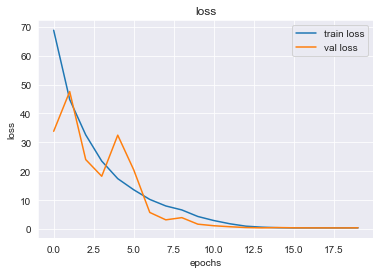

In [79]:
hist_cnn = pd.DataFrame(hist.history)
a = list(hist_cnn.index)
b = list(hist_cnn['loss'].values)
c = list(hist_cnn['val_loss'].values)
plt.plot(a, b, label = 'train loss')
plt.plot(a, c, label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend();

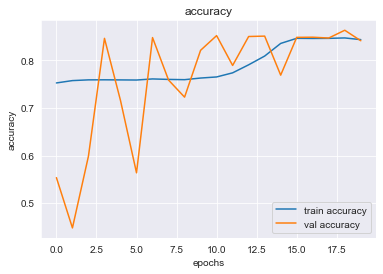

In [81]:
d = list(hist_cnn['accuracy'].values)
e = list(hist_cnn['val_accuracy'].values)
plt.plot(a, d, label = 'train accuracy')
plt.plot(a, e, label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend();

In [82]:
score_cnn = model.evaluate(X_test_ohe, y_test_bin, verbose = 0)
print(f"accuracy for test set is {score_cnn[1]}")

accuracy for test set is 0.8392760157585144
